In [107]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime
import urllib.request

from geopy.geocoders import Nominatim
pd.set_option('display.max_columns', None)

In [108]:
tf.__version__

'2.15.0'

In [109]:
#start_date = input("Enter start date in yyyy/mm/dd format :")

In [110]:
#start_date = start_date.replace('/','')

In [111]:
#end_date = input("Enter end date in yyyy/mm/dd format :")

In [112]:
#end_date = end_date.replace('/','')

In [113]:
#address = input("Enter city name:")

In [114]:
#geolocator = Nominatim(user_agent="Kartikey")
#location= geolocator.geocode(address)
#print(location.address)
#print((location.latitude, location.longitude))
#latitude = location.latitude
#longitude = location.longitude

In [115]:
#url = 'https://power.larc.nasa.gov//api/temporal/daily/point?parameters=T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE&community=AG&longitude=longitude&latitude=latitude&start=start_date&end=end_date&format=CSV'

In [116]:
#urllib.request.urlretrieve(url,'weather.csv')

In [117]:
df = pd.read_csv('weather.csv',skiprows=14)

In [118]:
df.head()

,YEAR,MO,DY,T2M_MAX,T2M_MIN,TS,RH2M,PRECTOTCORR,WS10M
0,1982,1,1,14.94,2.58,2.76,35.19,0.00,2.09
1,1982,1,2,15.50,2.85,3.21,34.69,0.00,2.22
2,1982,1,3,14.44,2.90,2.33,29.31,0.00,1.66
3,1982,1,4,7.72,-0.85,2.22,73.31,2.55,2.23
4,1982,1,5,10.55,0.20,3.15,69.56,0.08,1.83


In [119]:
df['YEAR']=df.YEAR.astype(str)
df['MO']=df.MO.astype(str)
df['DY']=df.DY.astype(str)
#df['DOY'].rjust(3 + len(df['DOY']), '0')
#df['date']=datetime.strptime(df['YEAR'] + "/" + df['DOY'], "%Y-%j").strftime("%m-%d-%Y")
df['date']=df['YEAR'].str.cat(df['MO'], sep= '/')
df['DATE']=df['date'].str.cat(df['DY'], sep= '/')
df.head()

,YEAR,MO,DY,T2M_MAX,T2M_MIN,TS,RH2M,PRECTOTCORR,WS10M,date,DATE
0,1982,1,1,14.94,2.58,2.76,35.19,0.00,2.09,1982/1,1982/1/1
1,1982,1,2,15.50,2.85,3.21,34.69,0.00,2.22,1982/1,1982/1/2
2,1982,1,3,14.44,2.90,2.33,29.31,0.00,1.66,1982/1,1982/1/3
3,1982,1,4,7.72,-0.85,2.22,73.31,2.55,2.23,1982/1,1982/1/4
4,1982,1,5,10.55,0.20,3.15,69.56,0.08,1.83,1982/1,1982/1/5


In [120]:
df.drop(columns=['YEAR','MO','DY','date'],axis=1,inplace=True)
df.head()

,T2M_MAX,T2M_MIN,TS,RH2M,PRECTOTCORR,WS10M,DATE
0,14.94,2.58,2.76,35.19,0.00,2.09,1982/1/1
1,15.50,2.85,3.21,34.69,0.00,2.22,1982/1/2
2,14.44,2.90,2.33,29.31,0.00,1.66,1982/1/3
3,7.72,-0.85,2.22,73.31,2.55,2.23,1982/1/4
4,10.55,0.20,3.15,69.56,0.08,1.83,1982/1/5


In [121]:
df.set_index(['DATE'],inplace = True)
df.head()

,T2M_MAX,T2M_MIN,TS,RH2M,PRECTOTCORR,WS10M
DATE,,,,,,
1982/1/1,14.94,2.58,2.76,35.19,0.00,2.09
1982/1/2,15.50,2.85,3.21,34.69,0.00,2.22
1982/1/3,14.44,2.90,2.33,29.31,0.00,1.66
1982/1/4,7.72,-0.85,2.22,73.31,2.55,2.23
1982/1/5,10.55,0.20,3.15,69.56,0.08,1.83


In [122]:
df.dtypes

T2M_MAX        float64
T2M_MIN        float64
TS             float64
RH2M           float64
PRECTOTCORR    float64
WS10M          float64
dtype: object

In [123]:
df.shape

(14335, 6)

In [124]:
df.isnull().any()

T2M_MAX        False
T2M_MIN        False
TS             False
RH2M           False
PRECTOTCORR    False
WS10M          False
dtype: bool

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14335 entries, 1982/1/1 to 2021/3/31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   T2M_MAX      14335 non-null  float64
 1   T2M_MIN      14335 non-null  float64
 2   TS           14335 non-null  float64
 3   RH2M         14335 non-null  float64
 4   PRECTOTCORR  14335 non-null  float64
 5   WS10M        14335 non-null  float64
dtypes: float64(6)
memory usage: 783.9+ KB


In [126]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision',3,
                       ):
  print(df)

            T2M_MAX  T2M_MIN     TS   RH2M  PRECTOTCORR  WS10M
DATE                                                          
1982/1/1      14.94     2.58   2.76  35.19         0.00   2.09
1982/1/2      15.50     2.85   3.21  34.69         0.00   2.22
1982/1/3      14.44     2.90   2.33  29.31         0.00   1.66
1982/1/4       7.72    -0.85   2.22  73.31         2.55   2.23
1982/1/5      10.55     0.20   3.15  69.56         0.08   1.83
1982/1/6      14.06    -0.95   2.23  41.94         0.00   2.21
1982/1/7      15.96     2.88   2.98  35.00         0.00   1.94
1982/1/8      12.92     4.33   2.27  36.12         0.00   1.45
1982/1/9      12.65     0.60   1.84  46.56         4.64   1.55
1982/1/10      6.94    -0.31   0.06  78.62         3.63   1.52
1982/1/11     10.29    -1.35   1.01  59.56         0.00   1.97
1982/1/12     11.23     0.45   1.03  48.19         0.00   1.74
1982/1/13     10.78     0.03   0.69  47.69         0.00   1.84
1982/1/14     13.11    -1.40   0.73  35.31         0.00

In [127]:
df.tail()

,T2M_MAX,T2M_MIN,TS,RH2M,PRECTOTCORR,WS10M
DATE,,,,,,
2021/3/27,22.68,10.28,14.29,32.94,0.00,2.67
2021/3/28,22.33,9.14,14.94,41.94,0.01,3.22
2021/3/29,22.05,9.18,14.69,42.38,0.08,3.32
2021/3/30,23.64,8.44,14.88,27.12,0.00,3.24
2021/3/31,23.34,7.07,13.76,19.62,0.00,4.38


In [128]:
df.describe()

,T2M_MAX,T2M_MIN,TS,RH2M,PRECTOTCORR,WS10M
count,14335.000000,14335.000000,14335.000000,14335.000000,14335.000000,14335.000000
mean,19.297798,8.642352,12.272197,54.915478,3.099595,2.265180
std,5.750267,5.908760,7.343703,22.465528,8.400359,0.555148
min,1.730000,-8.820000,-7.170000,8.060000,0.000000,0.730000
25%,15.080000,3.950000,5.705000,36.250000,0.000000,1.860000
50%,19.920000,8.610000,12.960000,51.250000,0.000000,2.140000
75%,23.130000,14.300000,18.940000,75.470000,1.690000,2.620000
max,34.050000,19.960000,26.900000,99.120000,159.160000,5.750000


In [129]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df_scaled = sc.fit_transform(df)

In [130]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(df_scaled, test_size=0.2, shuffle = False)

x_train, y_train, x_test, y_test= [],[],[],[]
for i in range (1,len(train)):
  x_train.append(train[i-1])
  y_train.append(train[i])
for i in range (1,len(test)):
  x_test.append(test[i-1])
  y_test.append(test[i])

In [131]:
pd.DataFrame(x_train)

,0,1,2,3,4,5
0,0.408725,0.396108,0.291459,0.297935,0.000000,0.270916
1,0.426052,0.405490,0.304667,0.292445,0.000000,0.296813
2,0.393255,0.407227,0.278838,0.233363,0.000000,0.185259
3,0.185334,0.276928,0.275609,0.716561,0.016022,0.298805
4,0.272896,0.313412,0.302906,0.675379,0.000503,0.219124
...,...,...,...,...,...,...
11462,0.874072,0.878040,0.881714,0.144191,0.000000,0.547809
11463,0.922649,0.868311,0.899912,0.163409,0.000000,0.615538
11464,0.930693,0.867616,0.910478,0.153745,0.000000,0.569721
11465,0.942760,0.883252,0.924861,0.146936,0.000000,0.629482


In [132]:
pd.DataFrame(y_train)

,0,1,2,3,4,5
0,0.426052,0.405490,0.304667,0.292445,0.000000,0.296813
1,0.393255,0.407227,0.278838,0.233363,0.000000,0.185259
2,0.185334,0.276928,0.275609,0.716561,0.016022,0.298805
3,0.272896,0.313412,0.302906,0.675379,0.000503,0.219124
4,0.381498,0.273454,0.275903,0.372062,0.000000,0.294821
...,...,...,...,...,...,...
11462,0.922649,0.868311,0.899912,0.163409,0.000000,0.615538
11463,0.930693,0.867616,0.910478,0.153745,0.000000,0.569721
11464,0.942760,0.883252,0.924861,0.146936,0.000000,0.629482
11465,0.967203,0.897498,0.936308,0.122886,0.000000,0.573705


In [133]:
x_train, y_train= np.array(x_train), np.array(y_train)
x_test, y_test= np.array(x_test), np.array(y_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((11467, 6), (11467, 6), (2866, 6), (2866, 6))

In [134]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import Dropout

In [135]:
model = Sequential()
model.add(Dense(6,input_dim=6, activation= 'relu'))
model.add(Dense(9,activation= 'relu'))
model.add(Dense(9,activation= 'relu'))
model.add(Dense(6))
model.summary()
model.compile(optimizer = 'adam', loss='mse', metrics = ['accuracy'])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 6)                 42        
                                                                 
 dense_32 (Dense)            (None, 8)                 56        
                                                                 
 dense_33 (Dense)            (None, 8)                 72        
                                                                 
 dense_34 (Dense)            (None, 6)                 54        
                                                                 
Total params: 224 (896.00 Byte)
Trainable params: 224 (896.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [140]:
history = model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 100, batch_size=15, shuffle=False)

Epoch 1/100
765/765 [==============================] - 2s 2ms/step - loss: 0.0043 - accuracy: 0.5975 - val_loss: 0.0044 - val_accuracy: 0.6396
Epoch 2/100
765/765 [==============================] - 2s 2ms/step - loss: 0.0040 - accuracy: 0.6143 - val_loss: 0.0042 - val_accuracy: 0.6692
Epoch 3/100
765/765 [==============================] - 2s 2ms/step - loss: 0.0042 - accuracy: 0.6027 - val_loss: 0.0044 - val_accuracy: 0.6479
Epoch 4/100
765/765 [==============================] - 2s 3ms/step - loss: 0.0040 - accuracy: 0.6183 - val_loss: 0.0042 - val_accuracy: 0.6731
Epoch 5/100
765/765 [==============================] - 2s 3ms/step - loss: 0.0041 - accuracy: 0.6094 - val_loss: 0.0043 - val_accuracy: 0.6535
Epoch 6/100
765/765 [==============================] - 2s 2ms/step - loss: 0.0040 - accuracy: 0.6232 - val_loss: 0.0041 - val_accuracy: 0.6724
Epoch 7/100
765/765 [==============================] - 2s 2ms/step - loss: 0.0041 - accuracy: 0.6131 - val_loss: 0.0045 - val_accuracy: 0.6483

In [138]:
y_pred = model.predict(x_test)
y_pred = sc.inverse_transform(y_pred)
actual_y_pred = sc.inverse_transform(y_test)

90/90 [==============================] - 0s 1ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

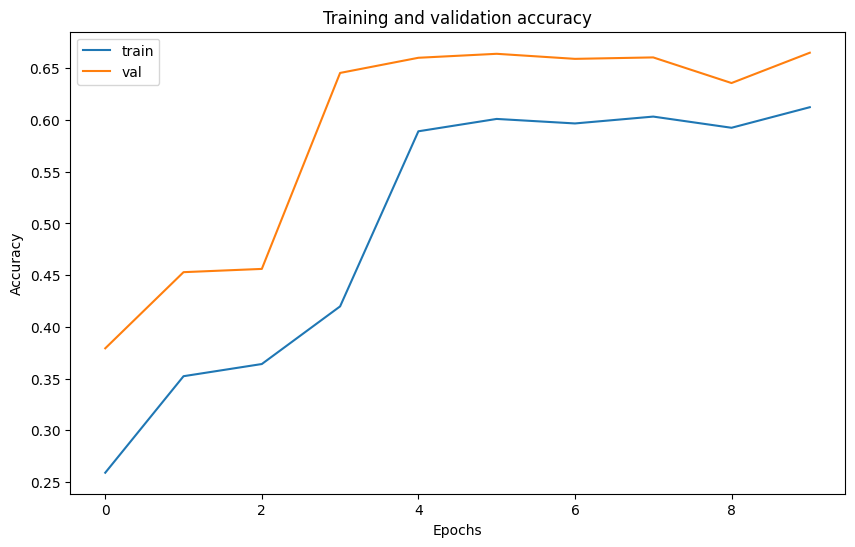

In [139]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show